data
transform_data


cart_signal_analyzer\signal_plot.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data_every['limit'] = EVENT_MIN_RSSI_LEVEL


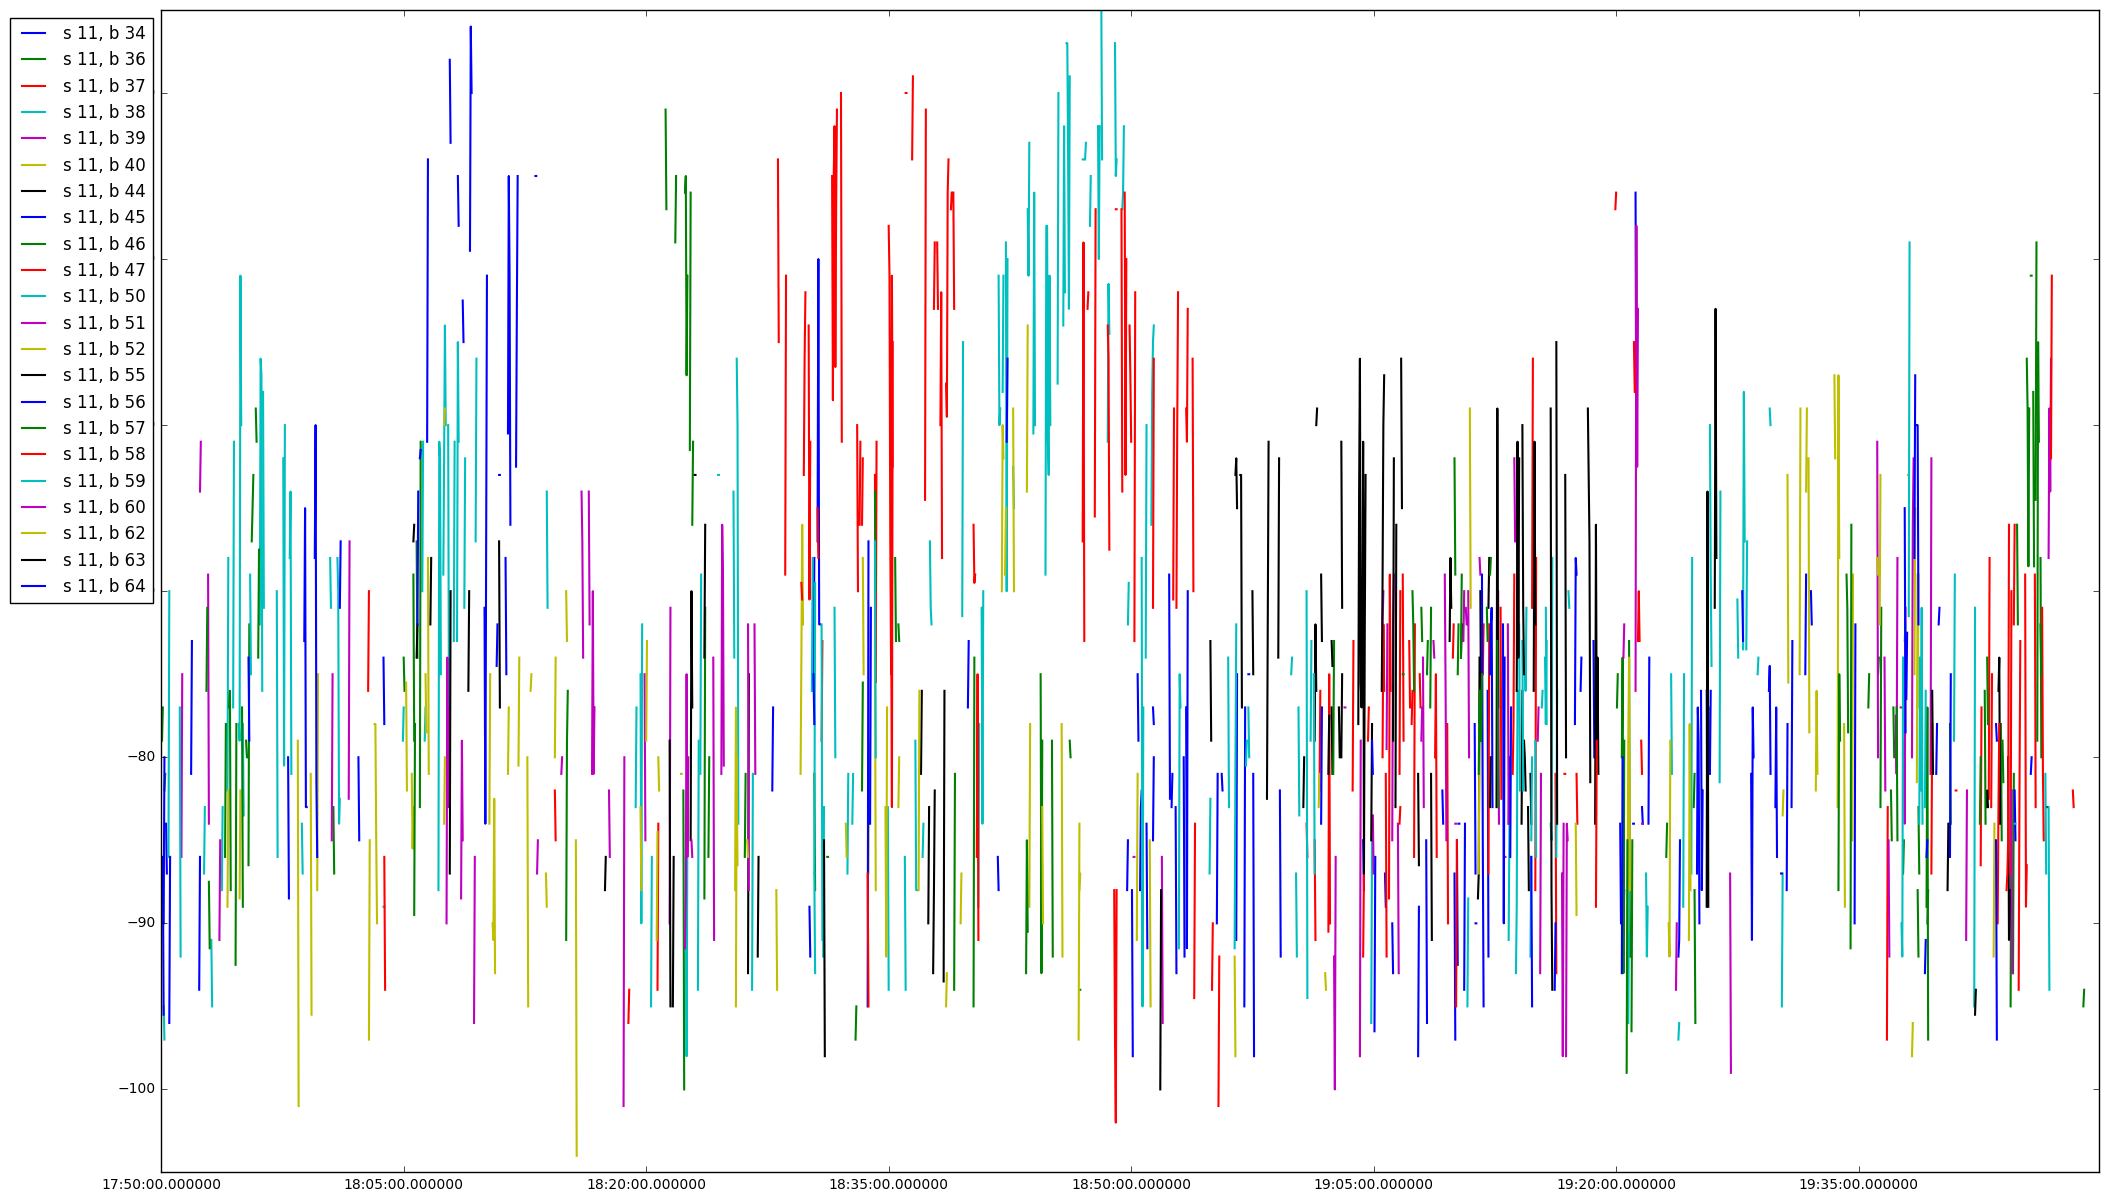

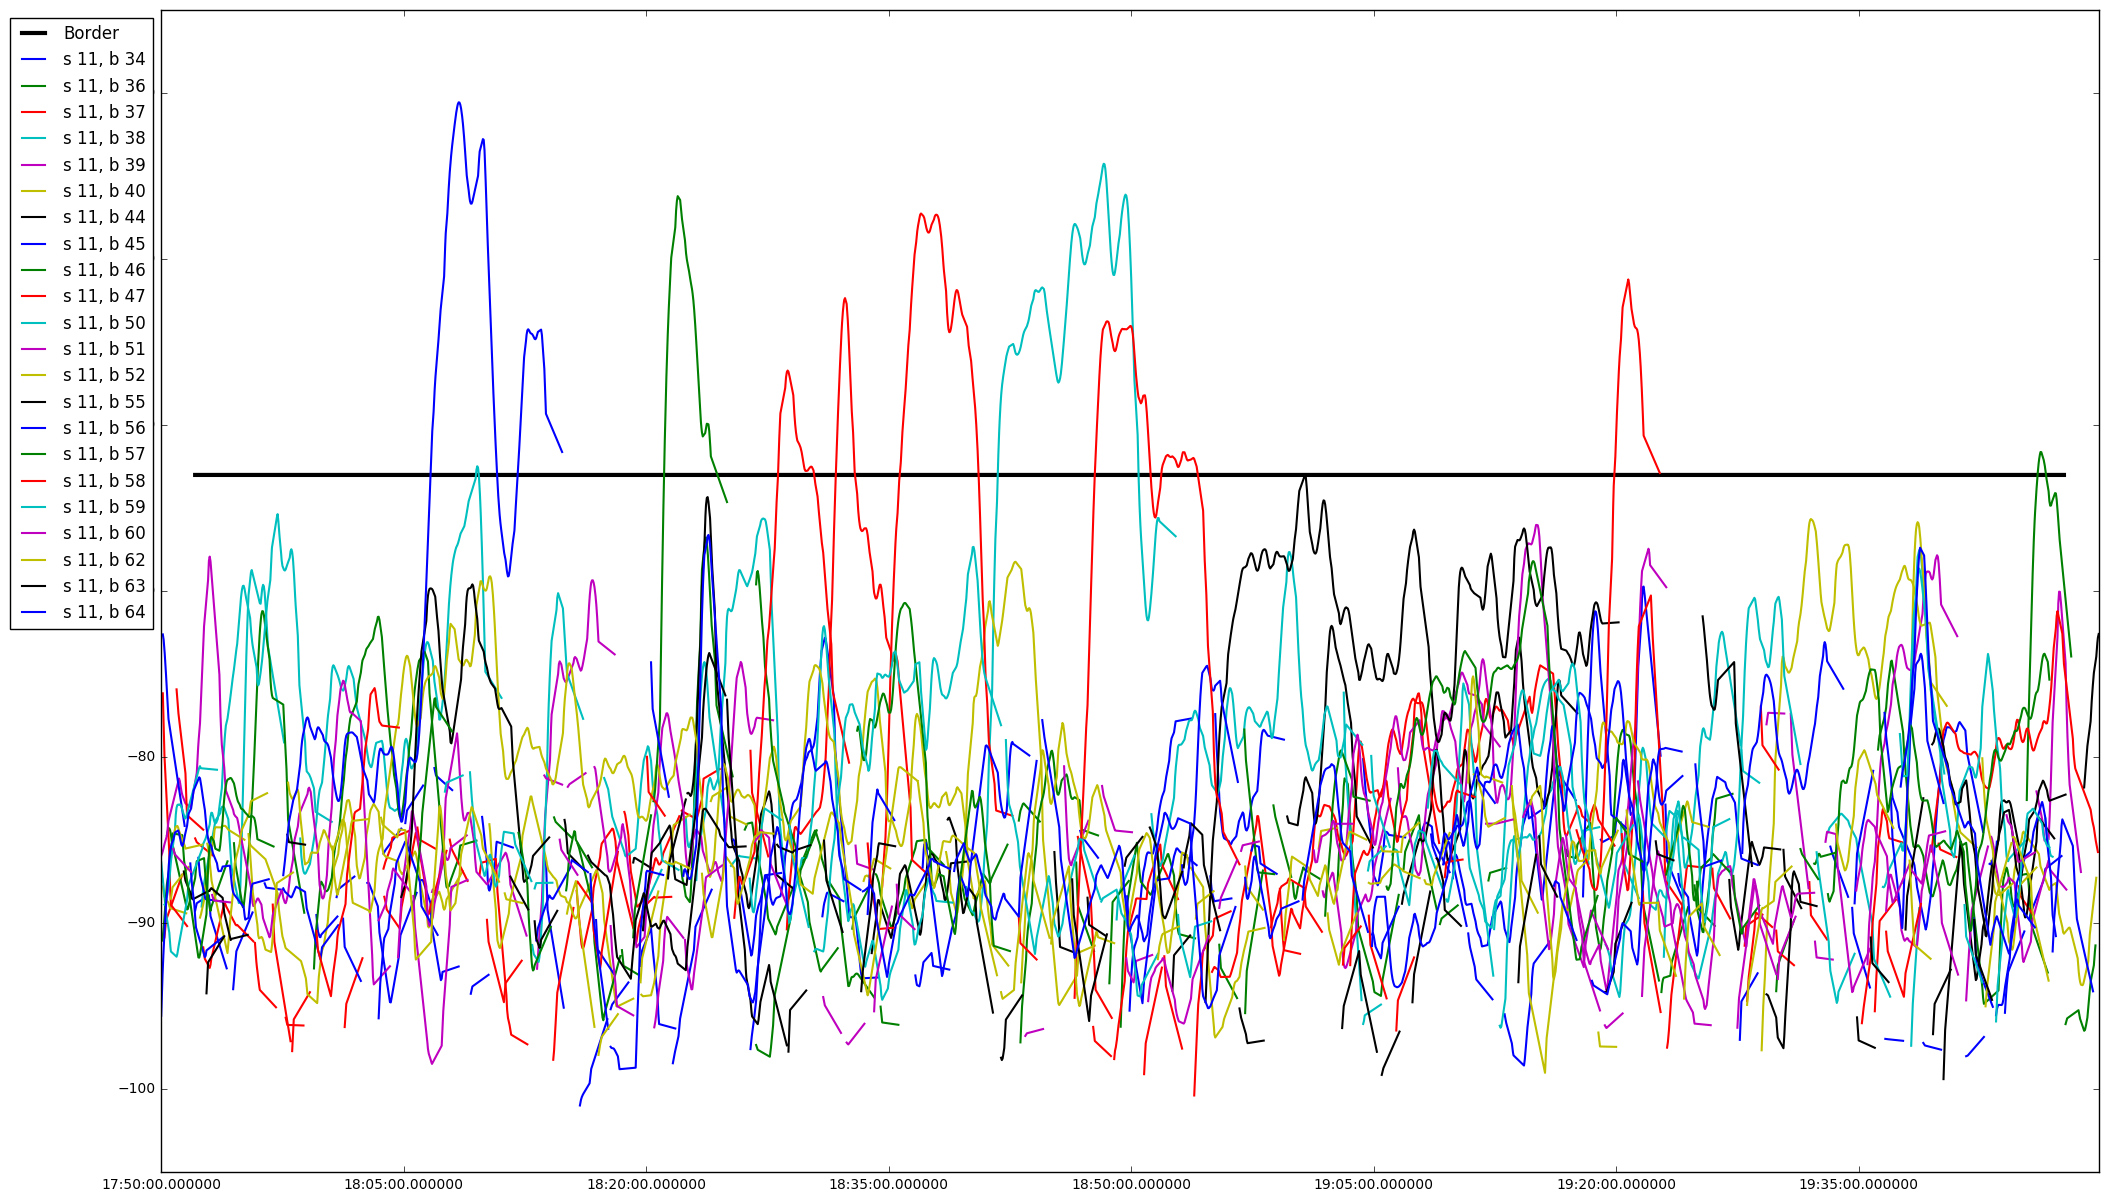

,timestamp_from,timestamp_to,sensor,with_charge,beacon
33,2016-12-19 18:06:40,2016-12-19 18:10:46,11,False,64
34,2016-12-19 18:21:07,2016-12-19 18:24:24,11,False,57
35,2016-12-19 18:28:10,2016-12-19 18:30:23,11,False,58
36,2016-12-19 18:31:44,2016-12-19 18:32:54,11,False,37
37,2016-12-19 18:35:41,2016-12-19 18:40:33,11,False,47
38,2016-12-19 18:41:45,2016-12-19 18:50:27,11,False,38
39,2016-12-19 18:41:47,2016-12-19 18:45:54,11,True,24
40,2016-12-19 19:01:51,2016-12-19 19:05:36,11,True,30
41,2016-12-19 19:19:54,2016-12-19 19:22:45,11,False,58
42,2016-12-19 19:39:08,2016-12-19 19:42:41,11,True,12


,timestamp,sensor,with_charge
22,2016-12-19 18:28:00,11,False
25,2016-12-19 18:33:00,11,False
30,2016-12-19 18:36:00,11,False
34,2016-12-19 18:42:00,11,True
51,2016-12-19 19:03:00,11,True
64,2016-12-19 19:21:00,11,False
74,2016-12-19 19:40:00,11,True
76,2016-12-19 19:44:00,11,False
78,2016-12-19 19:48:00,11,True


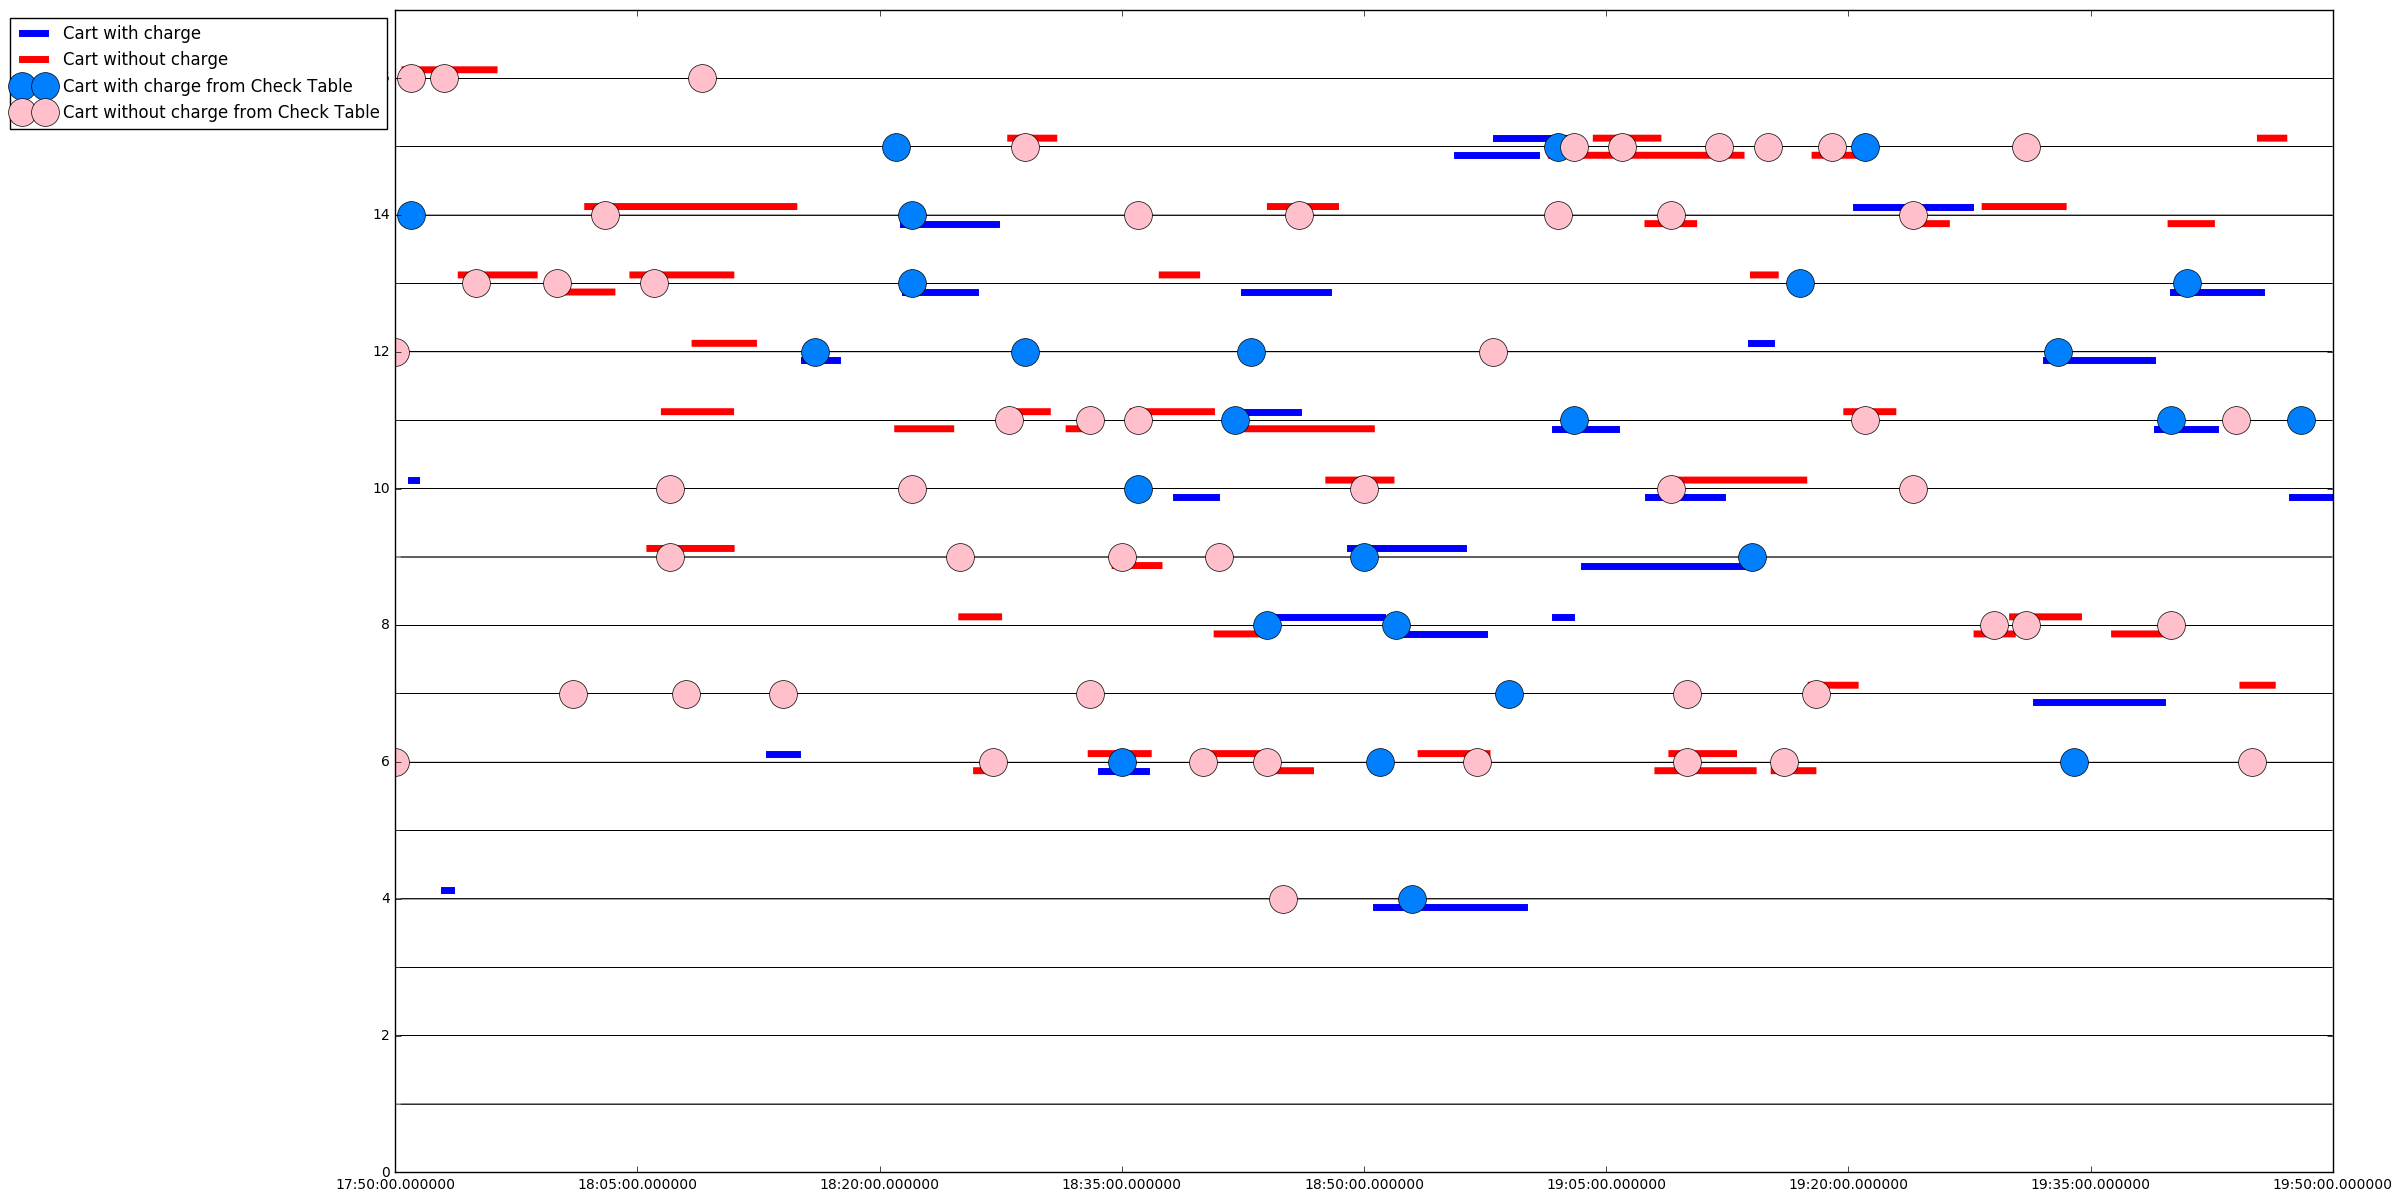

In [1]:
from IPython.display import display, HTML
from cart_signal_analyzer import *

log_data = get_data(PG_ENGINE)
print 'data'
transform_data_params = dict(
    [("interpolate_limit_sec", 7),
     ("ewm_span", 30),
     ("ewm_min_periods_sec", 1),
     ("ewm_ignore_na", False),
     ("ewm_level", 3)]
)

data = transform_data(log_data, **transform_data_params)
print 'transform_data'
check_data_sensor = get_check_data(PG_ENGINE)

df_sel_events = get_events(data, EVENT_MIN_RSSI_LEVEL, TIMEDELTA_SEC)
df_sel_events = df_sel_events.loc[df_sel_events['sensor'] < 17]

# График первоначальных данных и обработанных
log_data_for_plot = log_data.set_index('timestamp', drop=True)
log_data_for_plot = log_data_for_plot.groupby(
    ['sensor', 
     'beacon']
).resample('3S').rssi.mean()
log_data_for_plot = log_data_for_plot.reset_index()
plot_sensor_data(log_data_for_plot, SENSOR_FOR_PLOT, WITH_CHARGE_FOR_PLOT, False)

data_for_plot = transform_data(log_data, True, **transform_data_params)
plot_sensor_data(data_for_plot, SENSOR_FOR_PLOT, WITH_CHARGE_FOR_PLOT, True)
plt.show()

# Таблица полученных событий на заданной кассе
display(df_sel_events[df_sel_events['sensor'] == SENSOR_FOR_PLOT][
            ['timestamp_from', 'timestamp_to', 'sensor', 'with_charge', 'beacon']])

# Данные проверочной таблицы
display(check_data_sensor.loc[check_data_sensor['sensor'] == SENSOR_FOR_PLOT])


# График всех событий на всех кассах
plot_main_events(data, df_sel_events, check_data_sensor)

# Поиск событий парковка - касса

In [ ]:
from IPython.display import display, HTML
from cart_signal_analyzer import *
log_data = get_data(PG_ENGINE)

In [ ]:
list_time = []
list_time.append({"from": '2016-12-22 07:00:00', "to" : '2016-12-22 23:59:59'})

In [ ]:
for i in range(len(list_time)):
    DEFAULT_TIMESTAMP_FROM  = list_time[i]["from"]
    DEFAULT_TIMESTAMP_TO  = list_time[i]["to"]
    print DEFAULT_TIMESTAMP_FROM, DEFAULT_TIMESTAMP_TO
    log_data_day = log_data.loc[(
        log_data["timestamp"] >= DEFAULT_TIMESTAMP_FROM
    ) & (
        log_data["timestamp"] <= DEFAULT_TIMESTAMP_TO
    )].reset_index(drop=True)
    display(log_data_day.head())
    transform_data_params = dict(
        [("interpolate_limit_sec", 7),
         ("ewm_span", 30),
         ("ewm_min_periods_sec", 1),
         ("ewm_ignore_na", False),
         ("ewm_level", 3)]
    )

    data = transform_data(log_data_day, **transform_data_params)

    df_sel_events = get_events(data, EVENT_MIN_RSSI_LEVEL, TIMEDELTA_SEC)
    df_sel_events = df_sel_events.loc[df_sel_events['sensor'] < 17]

# (Данные записываются в БД)
    add_events_in_hall(data)


In [ ]:
df_in_hall_grouped = get_data_for_events_in_hall(PG_ENGINE)
df_in_hall_grouped_time = df_in_hall_grouped.loc[:,['sensor','datediff','with_charge']]
df_in_hall_grouped_time = df_in_hall_grouped_time.groupby(by = ['with_charge', 'datediff'])['sensor'].count()
df_in_hall_grouped_time = df_in_hall_grouped_time.reset_index()
df_in_hall_grouped_time.loc[:,'datediff'] = df_in_hall_grouped_time.loc[:,'datediff'] / 60
sum_t = df_in_hall_grouped_time.groupby(by = ['with_charge'])['sensor'].sum()

display(df_in_hall_grouped.groupby(['with_charge'])['datediff'].median())

def _mask_charge(data, with_charge):
    return data['with_charge'] == with_charge

df_in_hall_grouped_time = df_in_hall_grouped.loc[:, ['sensor', 'datediff', 'with_charge']]
df_in_hall_grouped_time = df_in_hall_grouped_time.groupby(by=['with_charge', 'datediff'])['sensor'].count()
df_in_hall_grouped_time = df_in_hall_grouped_time.reset_index()
df_in_hall_grouped_time.loc[:, 'datediff'] = df_in_hall_grouped_time.loc[:, 'datediff'] / 60

sum_by_charge = df_in_hall_grouped_time.groupby(by=['with_charge'])['sensor'].sum()

df_in_hall_grouped_time['weight'] = 0

for with_charge in [True, False]:
    fig = plt.figure(figsize=(25,10))
    mask = _mask_charge(df_in_hall_grouped_time, with_charge)
    df_in_hall_grouped_time.loc[mask, 'weight'] = df_in_hall_grouped_time.loc[mask, 'sensor'] * 1.0 / sum_by_charge[with_charge]
    df_in_hall_grouped_time.loc[mask, 'datediff'].hist(bins=np.arange(10, 200, 5),
                                                        weights=df_in_hall_grouped_time.loc[mask, 'weight'],facecolor='blue')
    plt.title(with_charge)
    plt.show()

# Распределение по дням

In [ ]:
def get_data(engine):
    sel_query = """
                SELECT *
                FROM public.events_in_hall
                WHERE beacon != 14
                """
    result = pd.read_sql_query(
        sel_query,
        con=engine
    )
    return result
    
def get_ratio_numbers(a, b):
    return round((a - b) * 1.0 / a * 100,2)

df_in_hall_grouped = get_data(PG_ENGINE)
df_in_hall_grouped["day"] = '2016-11-01'
for i in xrange(len(df_in_hall_grouped)):
    df_in_hall_grouped.loc[i,"day"] = df_in_hall_grouped.loc[i,"timestamp_from"].date() 
    
df = df_in_hall_grouped.groupby(['day','with_charge'])['datediff'].median()
df = df.reset_index()
result = df.pivot_table(
        index='day', columns=('with_charge'), values='datediff'
    ).reset_index()
result['Percent_ratio'] = 0
for i in xrange(len(result)):
    result.loc[i,'Percent_ratio'] = get_ratio_numbers(result.loc[i,False],result.loc[i,True])
    result.loc[i, False] = round(result.loc[i, False] / 60, 2)
    result.loc[i, True] = round(result.loc[i, True] / 60, 2)
med = result.set_index('day').copy()
display(result.set_index('day').head())

df = df_in_hall_grouped.groupby(['day','with_charge'])['datediff'].count()
df = df.reset_index()
result = df.pivot_table(
        index='day', columns=('with_charge'), values='datediff'
    ).reset_index()
cnt = result.set_index('day').copy()
display(result.set_index('day').head())

med.columns = ['Median False', 'Median True','Percent_ratio' ]
cnt.columns = ['Count False', 'Count True']

xls = cnt.join(med)

writer = pd.ExcelWriter('output1.xlsx')
xls.to_excel(writer,'Sheet1')
writer.save()

# Вывод событий кассы в файл

In [1]:
from IPython.display import display, HTML
from cart_signal_analyzer import *

DEFAULT_TIMESTAMP_FROM = '2016-12-19 17:48:00'
DEFAULT_TIMESTAMP_TO = '2016-12-19 19:50:00'

def get_data(engine):
    sel_query = """
                SELECT *
                FROM public.log_data
                WHERE timestamp >= '%s'
                AND timestamp <= '%s'
                """ % (DEFAULT_TIMESTAMP_FROM, DEFAULT_TIMESTAMP_TO)
    result = pd.read_sql_query(
        sel_query,
        con=engine
    )
    result = result.sort_values(
        ['sensor', 'beacon', 'timestamp'],
        ascending=[True, True, True]
    )
    return result

log_data = get_data(PG_ENGINE)
print DEFAULT_TIMESTAMP_FROM, DEFAULT_TIMESTAMP_TO
transform_data_params = dict(
    [("interpolate_limit_sec", 7),
     ("ewm_span", 30),
     ("ewm_min_periods_sec", 1),
     ("ewm_ignore_na", False),
     ("ewm_level", 3)]
)

data = transform_data(log_data, **transform_data_params)
print 'transform_data'
check_data_sensor = get_check_data(PG_ENGINE)

df_sel_events = get_events(data, EVENT_MIN_RSSI_LEVEL, TIMEDELTA_SEC)
df_sel_events = df_sel_events.loc[df_sel_events['sensor'] < 17]

2016-12-19 17:48:00 2016-12-19 19:50:00
data
transform_data
